# Introduction to Decision Trees and Random Forests for Predictive Analysis

Importing Libraries
The script begins with the importation of essential Python libraries which form the backbone of data handling, manipulation, and visualization processes. pandas is used for data manipulation and analysis, numpy for numerical operations, matplotlib and seaborn for data visualization, and several modules from sklearn for executing machine learning tasks including classification and dimensionality reduction.

Dataset Loading
The dataset is loaded from a specified URL into a DataFrame named data using pandas’ pd.read_csv(url) function. This dataset presumably contains various features necessary for a predictive modeling task.

Data Inspection
Initial inspection of the dataset involves displaying the DataFrame data. This step is crucial as it provides a firsthand look at the data structure, types of data columns, and potential issues like missing values or incorrect formats which might need cleaning or transformation.

Exploratory Data Analysis (EDA)

Preliminary Data Cleaning: Before delving into analysis, data cleaning is suggested to handle issues such as missing values or duplicate entries. While the code snippet mentions potential cleaning steps, actual implementation details like handling missing values are not shown.
Summary Statistics: The script computes summary statistics for numerical columns using data.describe(). This method provides insights into the count, mean, standard deviation, min/max values, and quartiles, essential for understanding the distribution of numerical features.
Distribution of Categorical Variables: Visualizing the distribution of categorical variables using count plots helps in understanding the frequency of categories which can influence the predictive models’ performance.
Checking for Missing Values: Identification of missing values is performed using data.isnull().sum(). Addressing these missing values is crucial as they can affect the outcome of predictive models.
Handling Data Types: The script includes steps to ensure data columns are of appropriate types. For instance, converting percentages stored as strings into numerical values facilitates their use in mathematical calculations and models.
Decision Tree and Random Forest Models

Model Initialization: The script sets up Decision Tree and Random Forest classifiers. These models are chosen due to their capability to handle both numerical and categorical data and their robustness against overfitting, especially in the case of Random Forests.
Model Training: Training these models on cleaned and preprocessed data involves fitting the model to the training set, allowing the algorithms to learn from the features.
Model Evaluation: Evaluation of models typically includes calculating accuracy, precision, recall, and other relevant metrics. However, specific details on performance metrics evaluation are not included in this snippet but are crucial for validating model effectiveness.

This script outlines a structured approach to using Decision Trees and Random Forests for predictive analysis in Python. Key steps include data preparation, exploratory data analysis, and model training, which are foundational for any data-driven project aiming to make predictions or classifications based on historical data.

In [92]:
# Importing Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load the dataset
url = "https://raw.githubusercontent.com/Vijayasuriya/M11-DS/main/M11_Data.csv"
data = pd.read_csv(url)
data


,report_school_year,aggregation_index,aggregation_type,aggregation_name,nrc_code,nrc_desc,county_code,county_name,nyc_ind,membership_desc,subgroup_code,subgroup_name,enroll_cnt,grad_cnt,grad_pct,reg_cnt,reg_pct,dropout_cnt,dropout_pct
0,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,1,All Students,658,464,71%,310,47%,148,22%
1,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,2,Female,324,246,76%,169,52%,65,20%
2,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,3,Male,334,218,65%,141,42%,83,25%
3,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,4,American Indian/Alaska Native,-,-,-,-,-,-,-
4,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,5,Black,367,248,68%,183,50%,91,25%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73147,2018-19,3,District,DUNDEE CENTRAL SCHOOL DISTRICT,4,Rural High Needs,68,YATES,0,2013 Total Cohort - 6 Year Outcome - August 2019,18,Not Migrant,-,-,-,-,-,-,-
73148,2018-19,3,District,DUNDEE CENTRAL SCHOOL DISTRICT,4,Rural High Needs,68,YATES,0,2013 Total Cohort - 6 Year Outcome - August 2019,20,Homeless,-,-,-,-,-,-,-
73149,2018-19,3,District,DUNDEE CENTRAL SCHOOL DISTRICT,4,Rural High Needs,68,YATES,0,2013 Total Cohort - 6 Year Outcome - August 2019,21,Not Homeless,-,-,-,-,-,-,-
73150,2018-19,3,District,DUNDEE CENTRAL SCHOOL DISTRICT,4,Rural High Needs,68,YATES,0,2013 Total Cohort - 6 Year Outcome - August 2019,23,Not in Foster Care,-,-,-,-,-,-,-


# Exploratory Data Analysis

EDA is a crucial step in the data analysis process that helps us understand the dataset, identify patterns, and gather insights. Let's break down the main components and explanations of the EDA:

Preliminary Data Cleaning:

The code mentions the possibility of adding data cleaning steps, such as handling missing values and removing duplicates. However, specific cleaning steps are not shown in this code.
Summary Statistics:

print(data.describe()): This code snippet calculates and displays summary statistics for numeric columns in the dataset using the describe() function. It provides statistics like count, mean, standard deviation, minimum, 25th percentile, median (50th percentile), 75th percentile, and maximum for each numeric column.
Distribution of Categorical Variables:

The code snippet iterates through categorical columns (columns with data types 'object') and creates count plots (bar plots) to visualize the distribution of each categorical variable.
It uses sns.countplot() from the Seaborn library to create these count plots.
Displaying the First Few Rows:

data.head(): This code snippet displays the first few rows of the dataset using the head() function. It provides a quick preview of the dataset's structure and the values in the initial rows.
Checking for Missing Values:

missing_values = data.isnull().sum(): This code calculates the number of missing values in each column of the dataset and stores the results in the missing_values Series.
It then prints the missing_values Series to show the count of missing values for each column.
Removing Duplicate Rows:

data.drop_duplicates(inplace=True): This code removes duplicate rows from the dataset, keeping only the first occurrence of each unique row. The inplace=True argument modifies the dataset in place.
Converting Columns to Appropriate Data Types:

The code suggests converting specific columns to appropriate data types. However, in the provided code, placeholder column names like "numeric_column" and "date_column" are used without specific context.
Handling Missing Values (Example):

data['reg_pct'] = pd.to_numeric(data['reg_pct'], errors='coerce'): This code converts the 'reg_pct' column to numeric data type using the pd.to_numeric() function. The 'coerce' option is used to convert non-numeric values to NaN (missing values).
Visualizing Categorical Distributions:

The code iterates through categorical columns and creates count plots to visualize the distribution of each categorical variable.
It sets the order of categories on the x-axis based on the value counts in each category.
Pairplot and Correlation Heatmap:

sns.pairplot(): This code creates a pairplot of numeric variables using Seaborn. A pairplot shows scatter plots for all pairs of numeric variables and histograms along the diagonal.
sns.heatmap(): The code generates a heatmap to visualize the correlation matrix of numeric variables. It uses a color map ('coolwarm') to represent the strength and direction of correlations between variables.
Overall, this code provides a good starting point for exploring the dataset, understanding its structure, and identifying potential data quality issues.

       aggregation_index      nrc_code   county_code       nyc_ind  \
count            73152.0  73152.000000  73152.000000  73152.000000   
mean                 3.0      4.588583     36.251859      0.055255   
std                  0.0      1.203507     20.588044      0.228479   
min                  3.0      1.000000      1.000000      0.000000   
25%                  3.0      4.000000     17.000000      0.000000   
50%                  3.0      5.000000     40.000000      0.000000   
75%                  3.0      5.000000     57.000000      0.000000   
max                  3.0      6.000000     68.000000      1.000000   

       subgroup_code  
count   73152.000000  
mean       12.000930  
std         7.213138  
min         1.000000  
25%         6.000000  
50%        11.000000  
75%        18.000000  
max        25.000000  


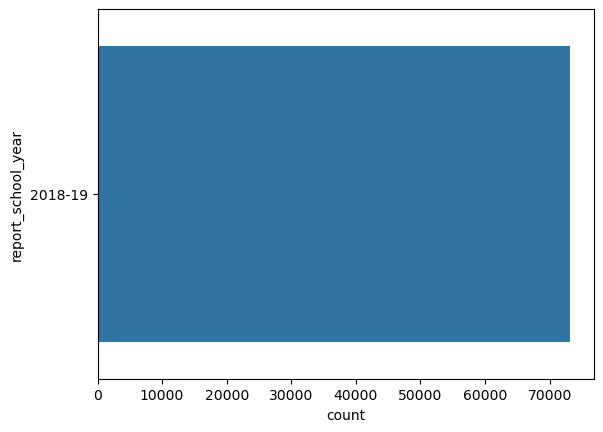

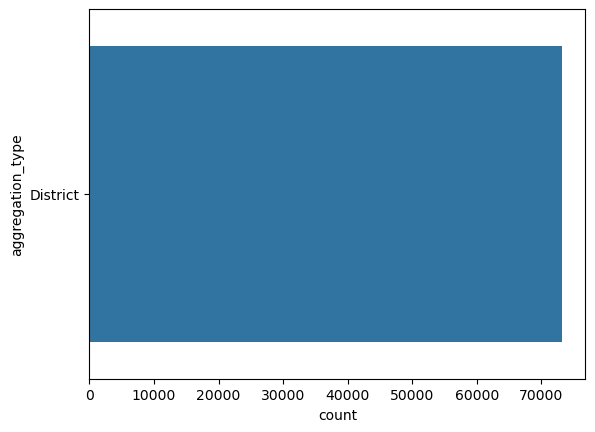

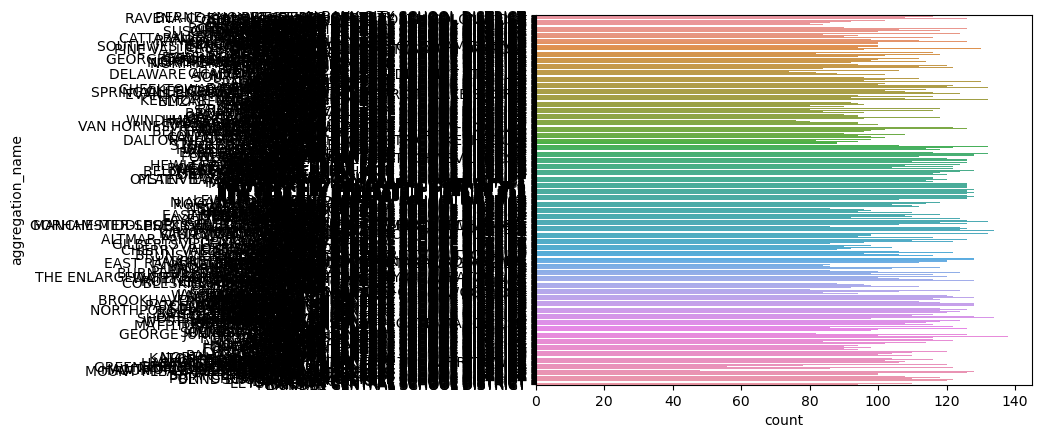

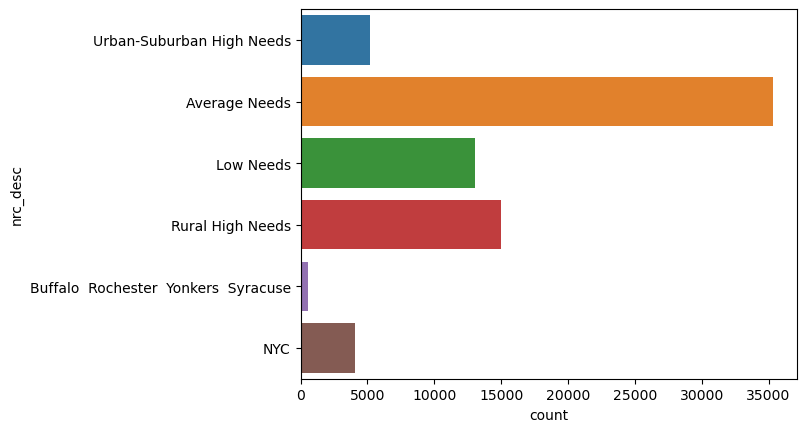

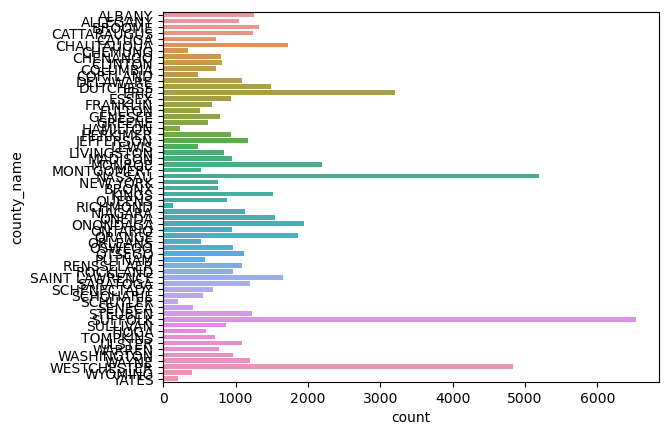

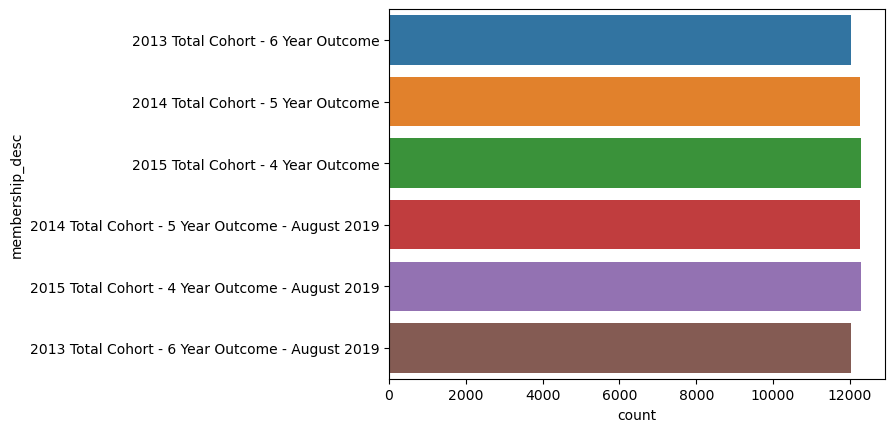

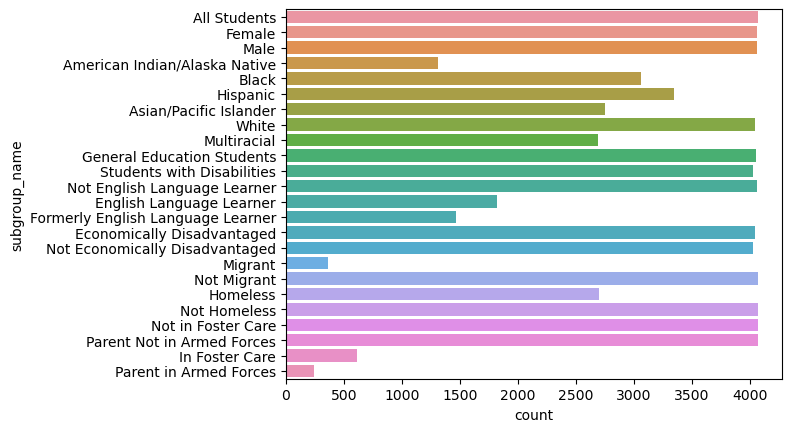

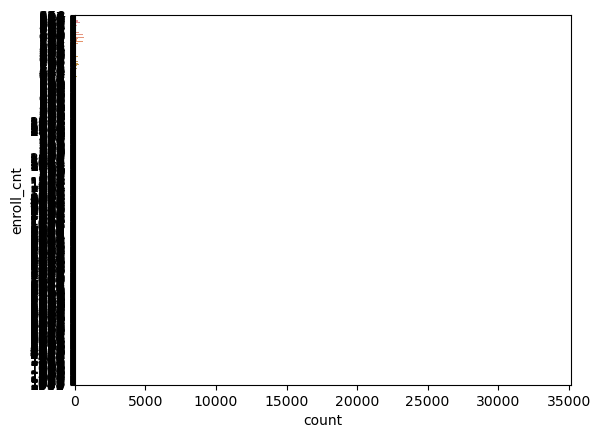

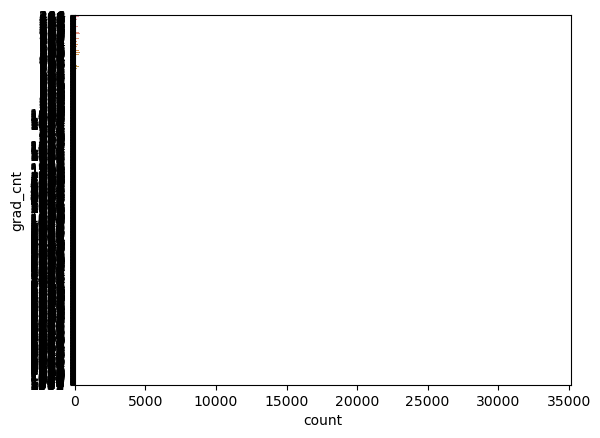

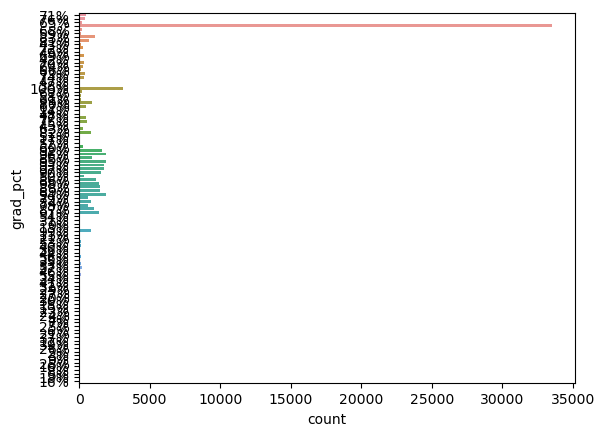

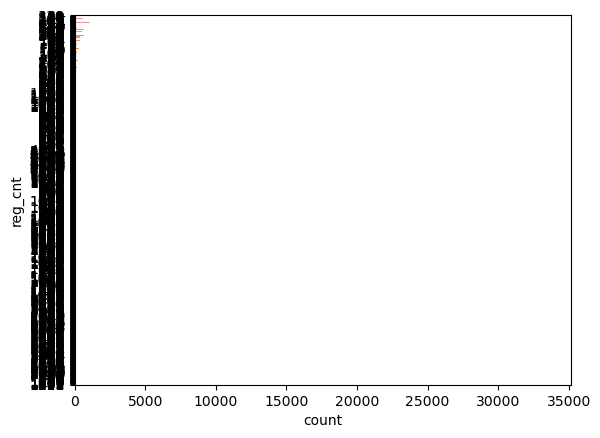

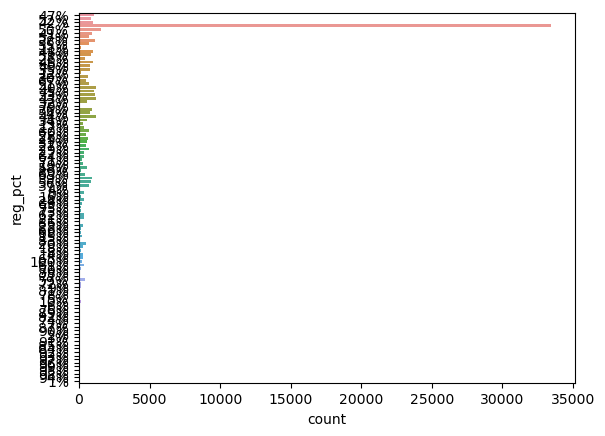

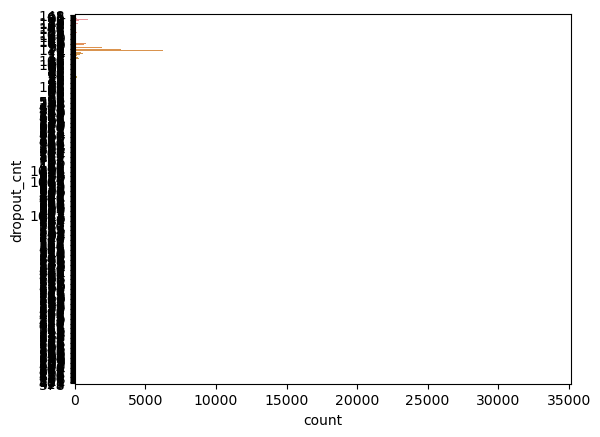

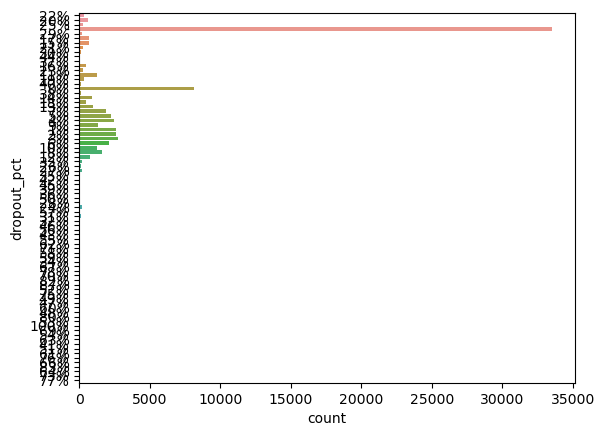

In [93]:
# Exploratory Data Analysis (EDA)
print(data.describe())
# Distribution of categorical variables
for column in data.select_dtypes(include=['object']).columns:
    sns.countplot(y=column, data=data)
    plt.show()



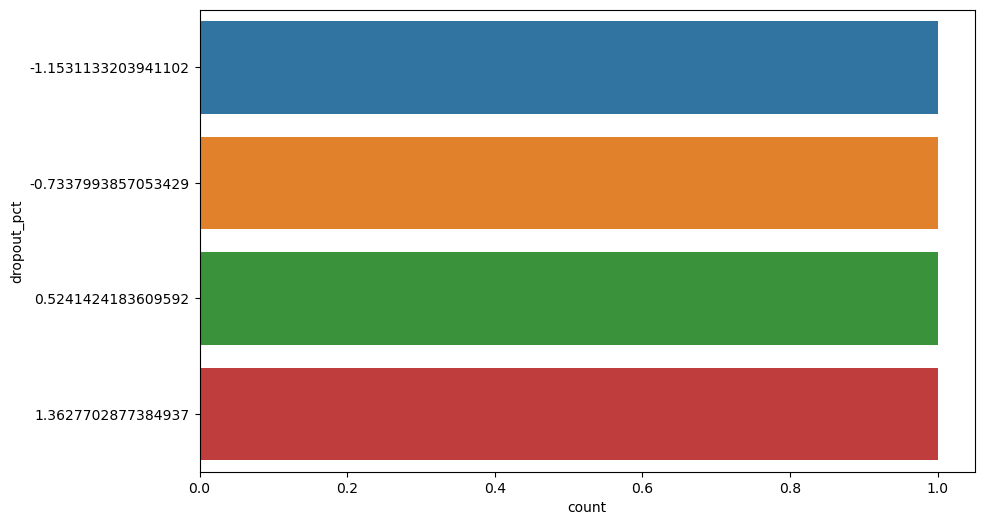

In [113]:
# Increase the width and height of the plots
plt.figure(figsize=(10, 6))
sns.countplot(y=column, data=data)
plt.show()

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 [Text(0.0, 0, '0.0'),
  Text(0.2, 0, '0.2'),
  Text(0.4, 0, '0.4'),
  Text(0.6000000000000001, 0, '0.6'),
  Text(0.8, 0, '0.8'),
  Text(1.0, 0, '1.0')])

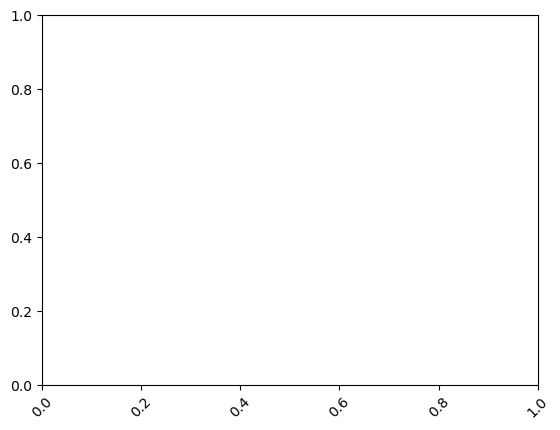

In [117]:
# Rotate y-axis labels by 45 degrees
plt.xticks(rotation=45)


In [118]:
# Creating subplots for categorical variables
categorical_columns = data.select_dtypes(include=['object']).columns

if not categorical_columns.empty:
    num_plots = len(categorical_columns)
    fig, axes = plt.subplots(num_plots, 1, figsize=(10, num_plots * 5))

    for i, column in enumerate(categorical_columns):
        sns.countplot(y=column, data=data, ax=axes[i])

    plt.show()
else:
    print("No categorical columns found in the dataset.")

No categorical columns found in the dataset.


In [94]:
# Display the first few rows of the dataset
data.head()


,report_school_year,aggregation_index,aggregation_type,aggregation_name,nrc_code,nrc_desc,county_code,county_name,nyc_ind,membership_desc,subgroup_code,subgroup_name,enroll_cnt,grad_cnt,grad_pct,reg_cnt,reg_pct,dropout_cnt,dropout_pct
0,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,1,All Students,658,464,71%,310,47%,148,22%
1,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,2,Female,324,246,76%,169,52%,65,20%
2,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,3,Male,334,218,65%,141,42%,83,25%
3,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,4,American Indian/Alaska Native,-,-,-,-,-,-,-
4,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,5,Black,367,248,68%,183,50%,91,25%


In [95]:
# Check for missing values
missing_values = data.isnull().sum()
print(missing_values)


report_school_year    0
aggregation_index     0
aggregation_type      0
aggregation_name      0
nrc_code              0
nrc_desc              0
county_code           0
county_name           0
nyc_ind               0
membership_desc       0
subgroup_code         0
subgroup_name         0
enroll_cnt            0
grad_cnt              0
grad_pct              0
reg_cnt               0
reg_pct               0
dropout_cnt           0
dropout_pct           0
dtype: int64


In [96]:
# Removing duplicate rows
data.drop_duplicates(inplace=True)


In [97]:
# Summary statistics for numeric columns
summary_stats = data.describe()
print(summary_stats)

       aggregation_index      nrc_code   county_code       nyc_ind  \
count            73152.0  73152.000000  73152.000000  73152.000000   
mean                 3.0      4.588583     36.251859      0.055255   
std                  0.0      1.203507     20.588044      0.228479   
min                  3.0      1.000000      1.000000      0.000000   
25%                  3.0      4.000000     17.000000      0.000000   
50%                  3.0      5.000000     40.000000      0.000000   
75%                  3.0      5.000000     57.000000      0.000000   
max                  3.0      6.000000     68.000000      1.000000   

       subgroup_code  
count   73152.000000  
mean       12.000930  
std         7.213138  
min         1.000000  
25%         6.000000  
50%        11.000000  
75%        18.000000  
max        25.000000  


In [98]:
# Handle missing values in 'reg_pct' column
data['reg_pct'] = pd.to_numeric(data['reg_pct'], errors='coerce')

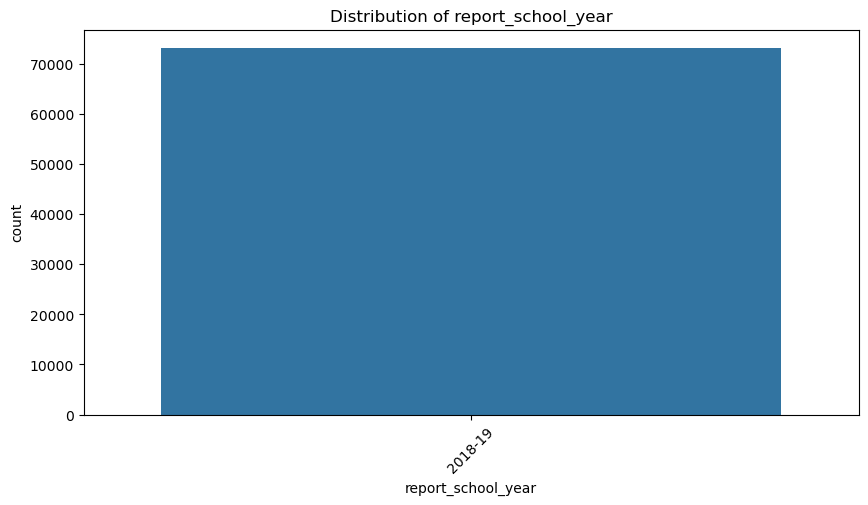

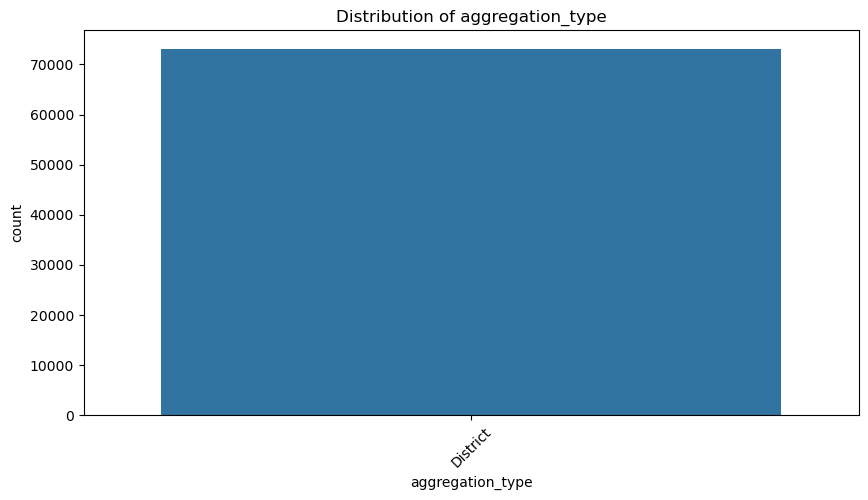

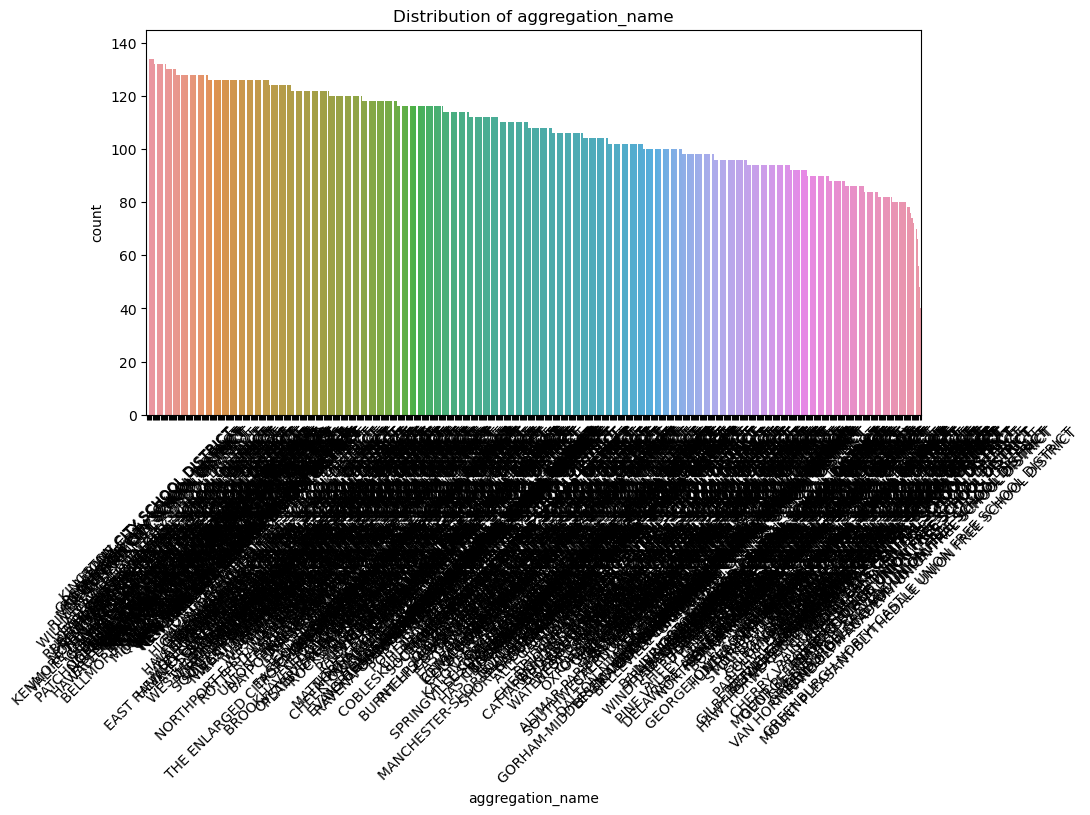

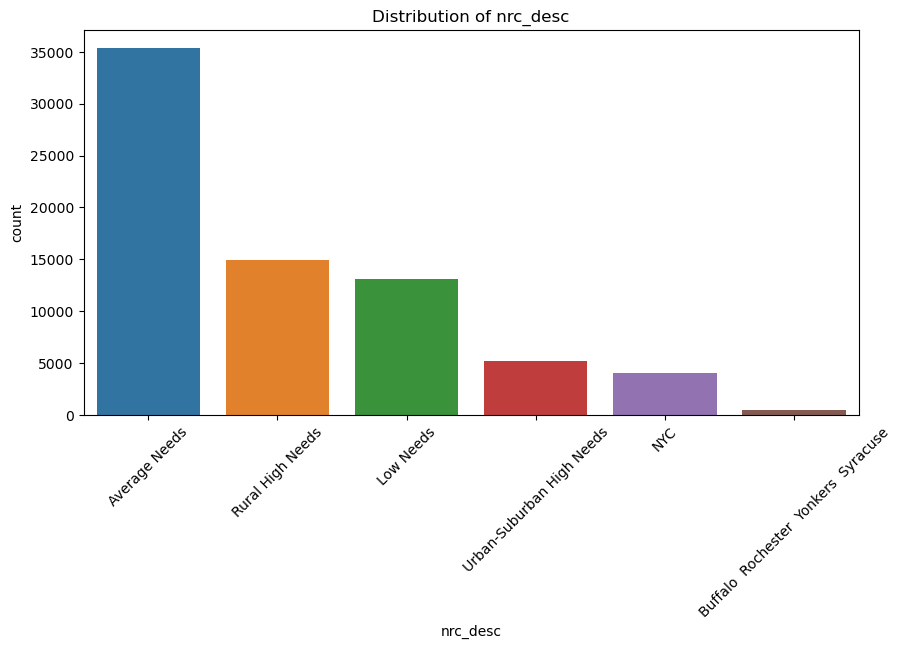

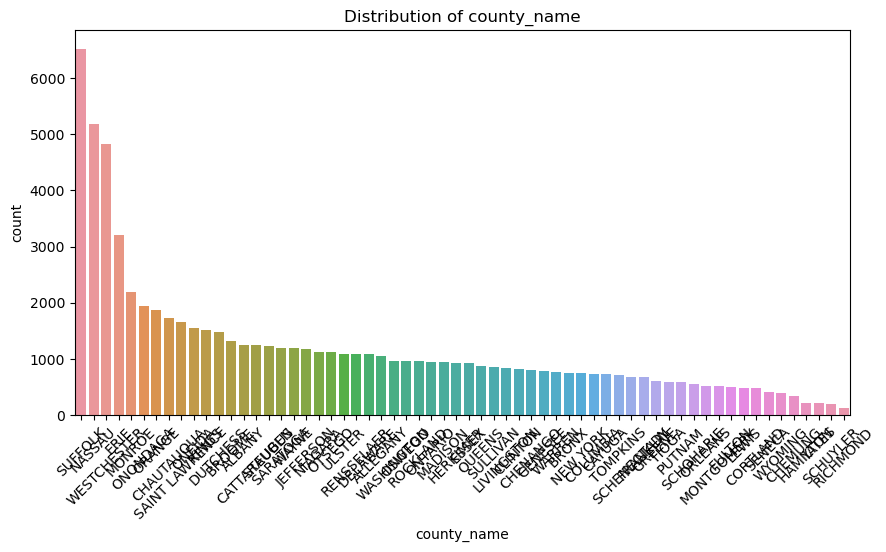

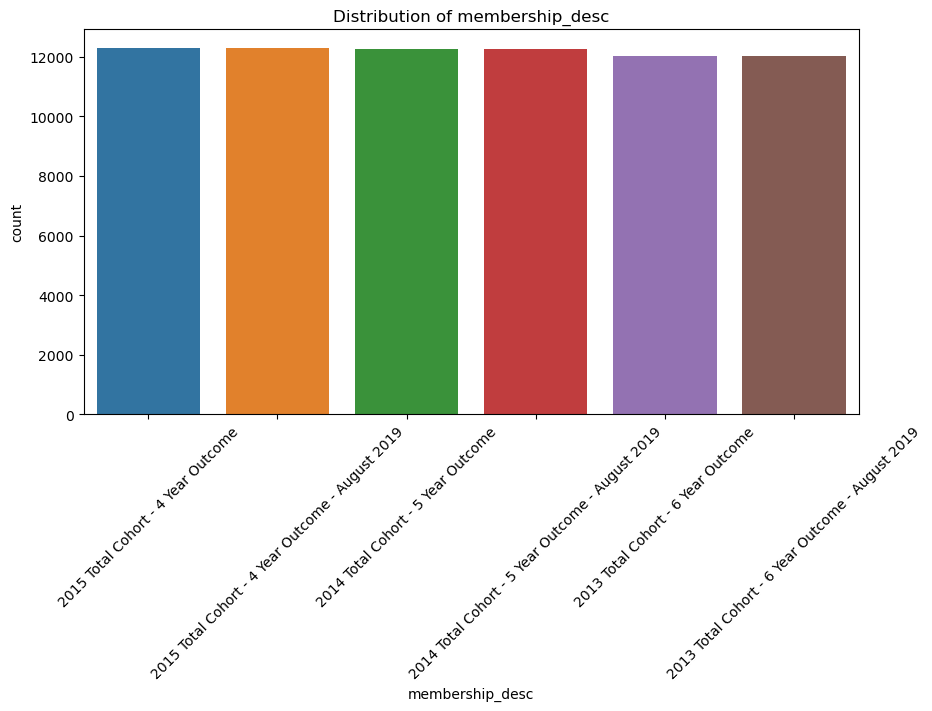

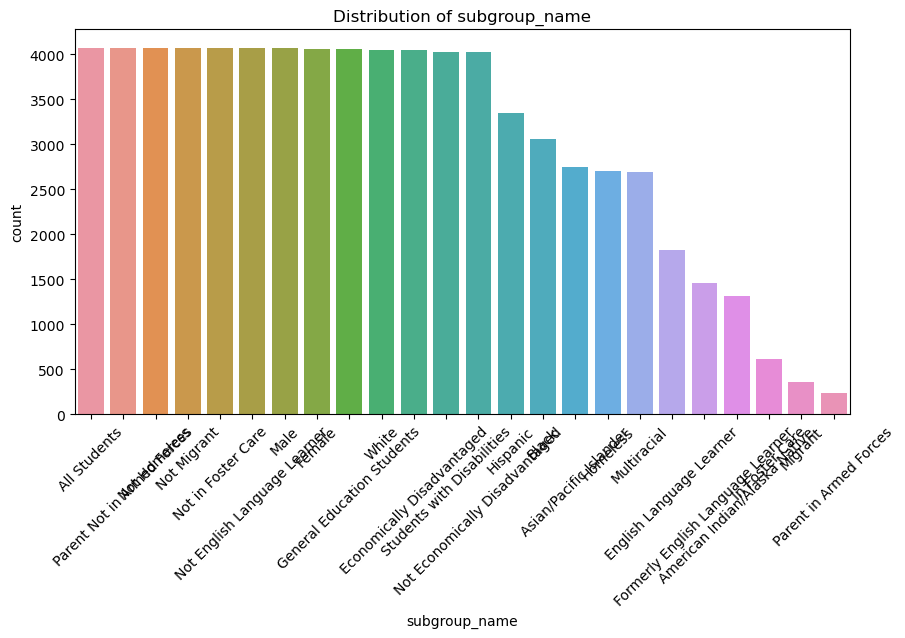

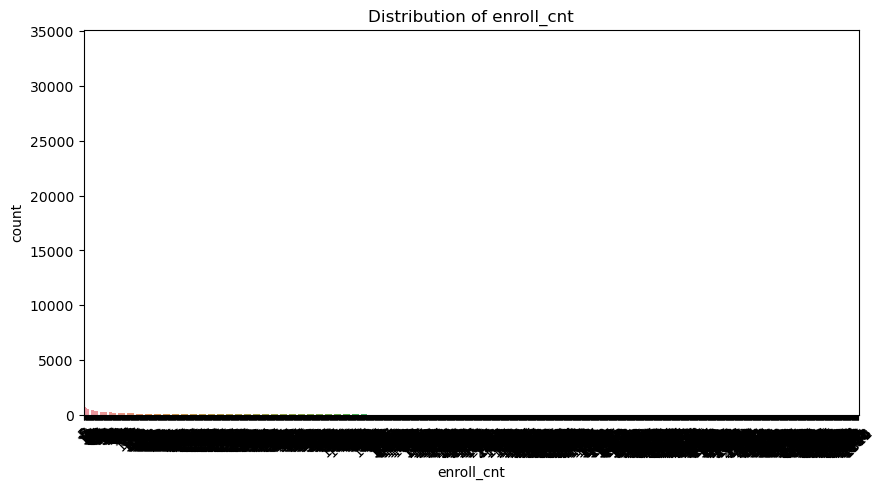

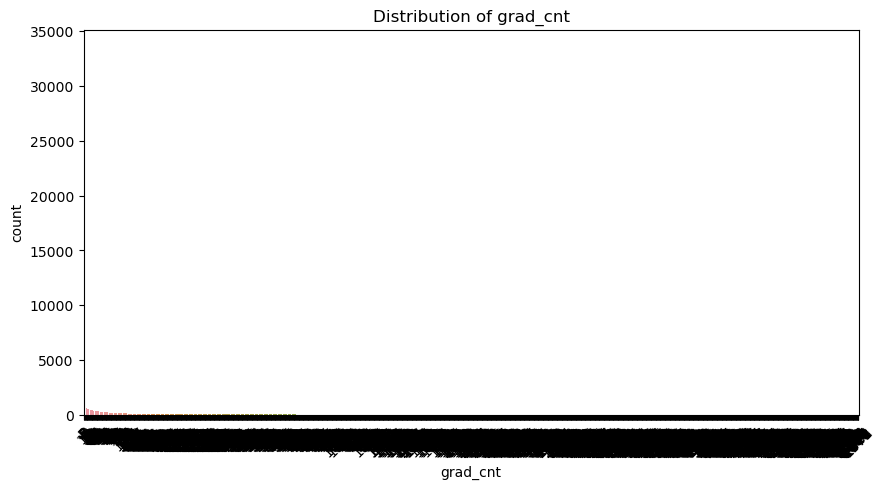

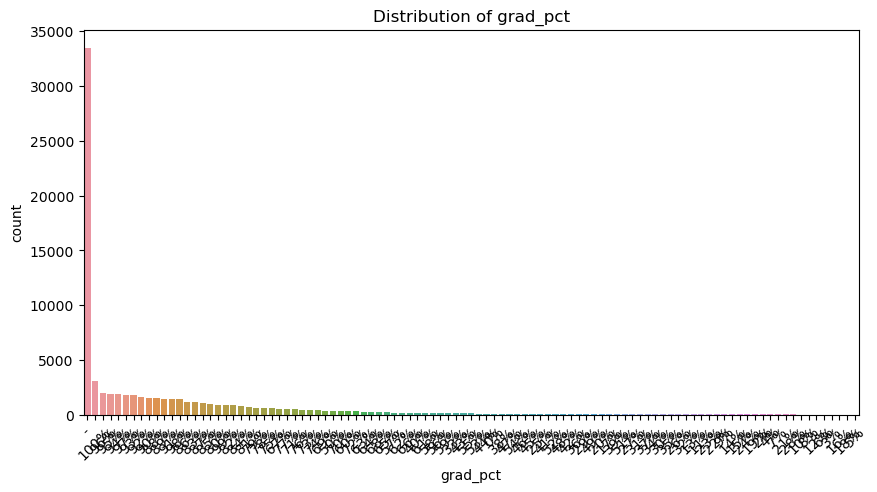

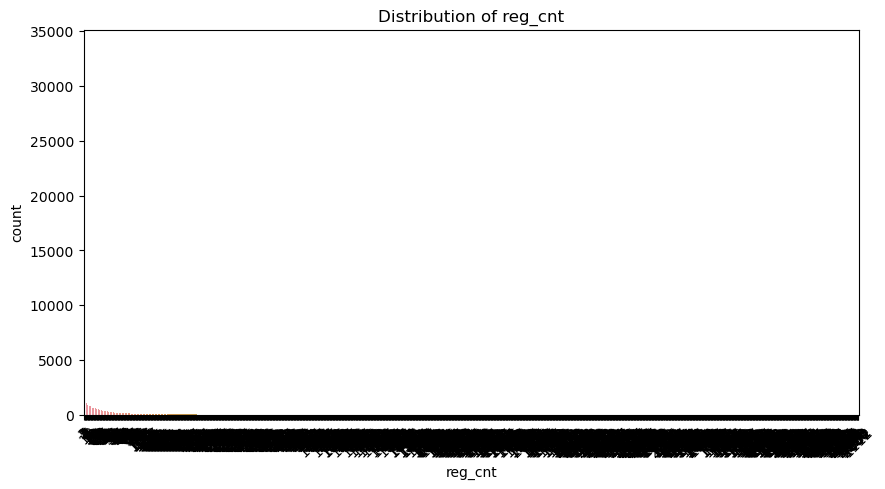

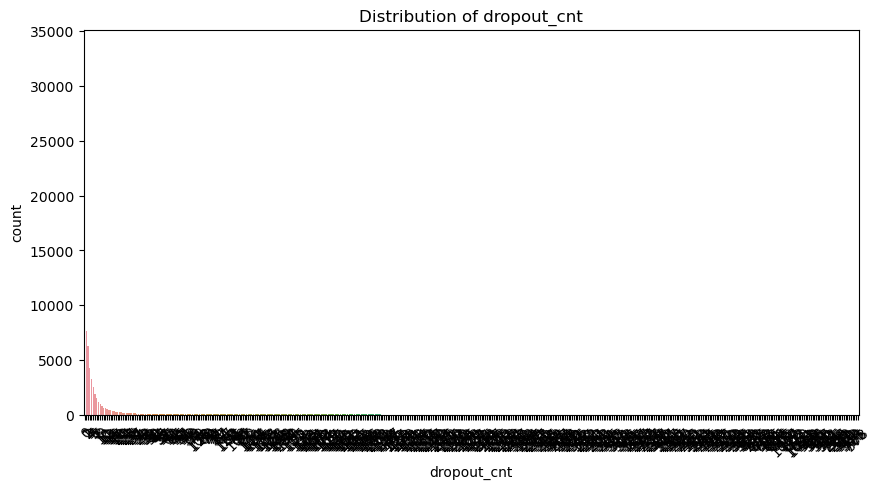

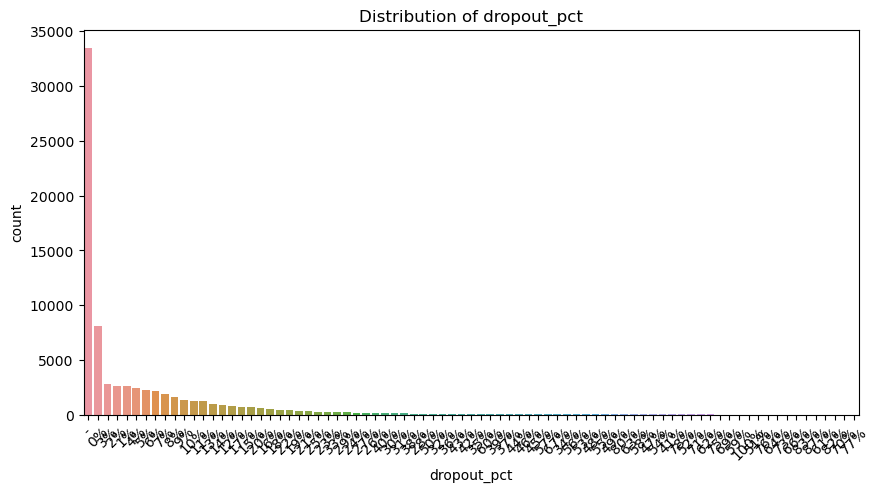

In [99]:
# Visualize the distribution of categorical variables
categorical_columns = data.select_dtypes(include=['object']).columns

for column in categorical_columns:
    plt.figure(figsize=(10, 5))
    sns.countplot(x=column, data=data, order=data[column].value_counts().index)
    plt.title(f'Distribution of {column}')
    plt.xticks(rotation=45)
    plt.show()

C:\Users\vijay\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


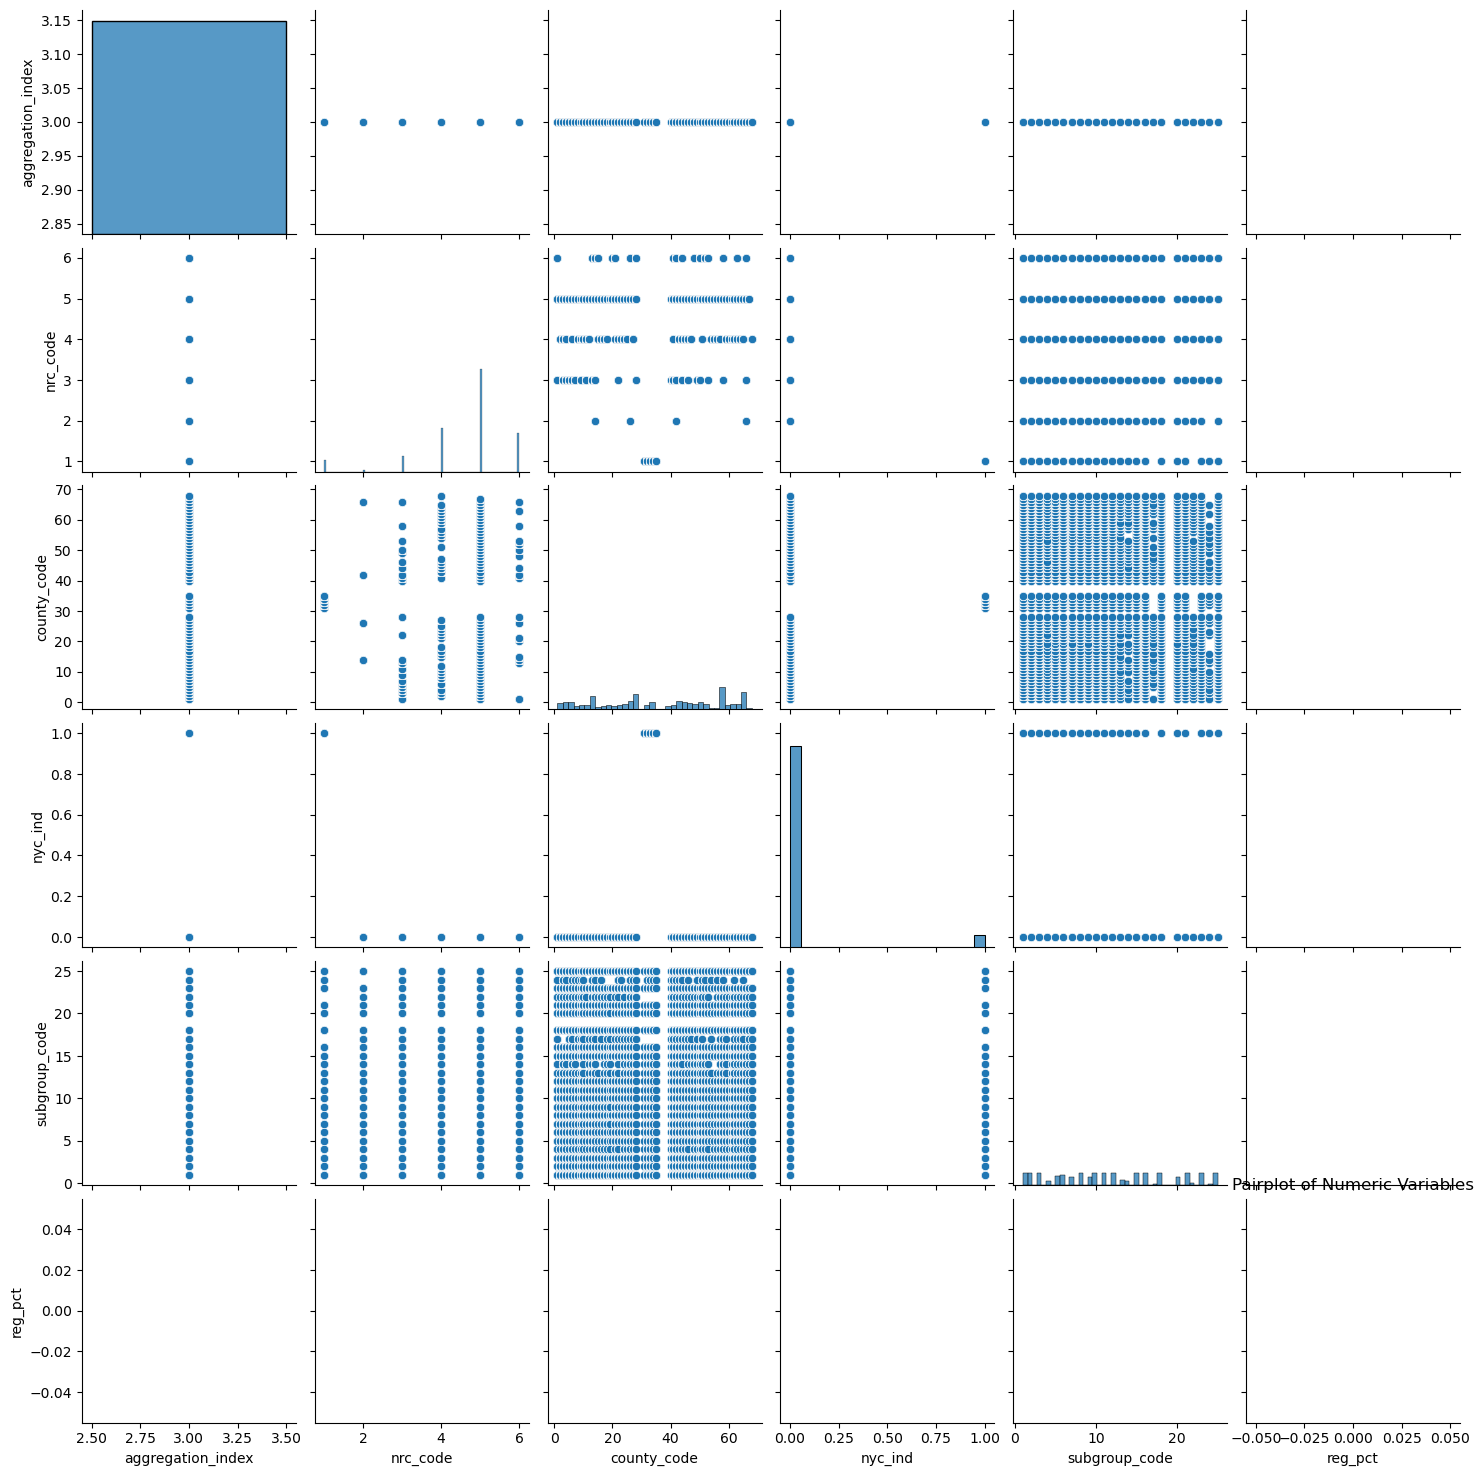

In [100]:
# Pairplot
sns.pairplot(data=data.select_dtypes(include=[np.number]))
plt.title("Pairplot of Numeric Variables")
plt.show()

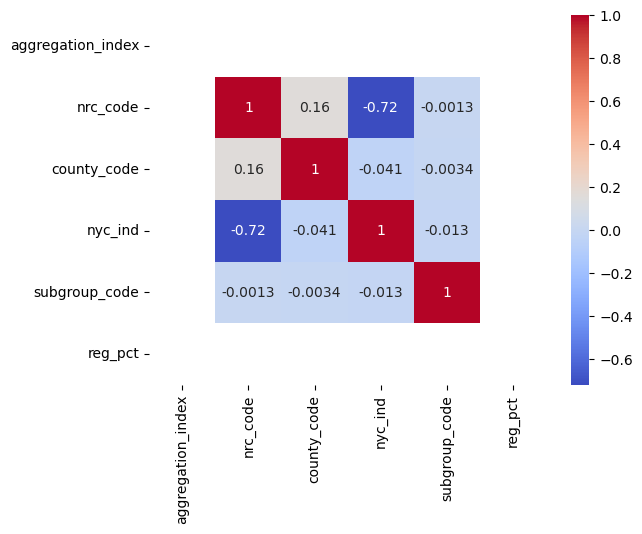

In [101]:
# Exclude non-numeric columns from the correlation matrix calculation
numeric_data = data.select_dtypes(include=[np.number])
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.show()


# DATA PREPARATION

Data preparation steps are performed, including the conversion of the 'reg_pct' column to numeric data type and the creation of a new categorical feature 'reg_pct_level' based on specific thresholds. Let's break down the code and its purpose:

Ensure 'reg_pct' is Numeric:

data['reg_pct'] = pd.to_numeric(data['reg_pct'], errors='coerce'): This line converts the 'reg_pct' column to a numeric data type using the pd.to_numeric() function. The 'coerce' option is used to handle non-numeric values by converting them to NaN (missing values). This step ensures that the 'reg_pct' column contains numeric data for further analysis.
Define Thresholds and Categorization Function:

The code defines two threshold values, threshold_low and threshold_high, which are used to categorize the 'reg_pct' values into different levels.
threshold_low is set to 33, and threshold_high is set to 66.
Categorize 'reg_pct' into Levels:

The categorize_reg_pct function is defined to categorize 'reg_pct' values based on the defined thresholds. It takes a numeric value as input and assigns a category ('low', 'medium', or 'high') based on the value's position relative to the thresholds.
If the value is less than threshold_low, it is categorized as 'low'.
If the value is greater than or equal to threshold_low but less than threshold_high, it is categorized as 'medium'.
If the value is greater than or equal to threshold_high, it is categorized as 'high'.
Apply Categorization Function:

data['reg_pct_level'] = data['reg_pct'].apply(categorize_reg_pct): This line applies the categorize_reg_pct function to each value in the 'reg_pct' column and stores the corresponding category in a new column called 'reg_pct_level'. As a result, each row in the dataset will now have a 'reg_pct_level' indicating whether the 'reg_pct' value is 'low', 'medium', or 'high' based on the defined thresholds.
Overall, these steps are used to preprocess and categorize the 'reg_pct' column into meaningful levels that can be used for further analysis or visualization. The categorization is based on the specified thresholds, which divide the data into three distinct categories representing different levels of 'reg_pct'.

In [102]:
# Ensure 'reg_pct' is numeric
data['reg_pct'] = pd.to_numeric(data['reg_pct'], errors='coerce')
# Apply the categorize_reg_pct function
data['reg_pct_level'] = data['reg_pct'].apply(categorize_reg_pct)

In [103]:
# Data Preparation
# Define the thresholds for 'reg_pct_level'
threshold_low = 33
threshold_high = 66

def categorize_reg_pct(value):
    if value < threshold_low:
        return 'low'
    elif value < threshold_high:
        return 'medium'
    else:
        return 'high'

data['reg_pct_level'] = data['reg_pct'].apply(categorize_reg_pct)



# Prepped Data Review

Data preparation review steps are performed to clean and preprocess the dataset:

Handling Missing Values:

data.dropna(inplace=True): This line removes rows with missing values from the dataset using the dropna() function. The inplace=True argument ensures that the changes are applied to the dataset in place, meaning that rows with missing values are removed, and the dataset is updated.
Removing Duplicate Rows:

data.drop_duplicates(inplace=True): This line removes duplicate rows from the dataset using the drop_duplicates() function. Duplicate rows are identified by comparing all column values, and only the first occurrence of each duplicate row is retained in the dataset.
Encoding Categorical Variables:

from sklearn.preprocessing import LabelEncoder: This line imports the LabelEncoder from scikit-learn, which is used to encode categorical variables.
label_encoder = LabelEncoder(): An instance of the LabelEncoder is created.
data['aggregation_type'] = label_encoder.fit_transform(data['aggregation_type']): This line encodes the 'aggregation_type' column by transforming its categorical values into numerical labels.
Similar encoding is performed for the 'subgroup_name' and 'membership_desc' columns.
Converting String Representation to Numeric:

numeric_cols = ['enroll_cnt', 'grad_cnt', 'grad_pct', 'reg_cnt', 'dropout_cnt', 'dropout_pct']: A list of column names is created, representing columns with string representations of numeric values.
data[numeric_cols] = data[numeric_cols].apply(pd.to_numeric, errors='coerce'): This line converts the selected columns to numeric data types using the pd.to_numeric() function. The errors='coerce' argument ensures that any non-numeric values are converted to NaN (missing values) rather than raising an error.
Handling Outliers (Optional):

A code example for handling outliers using the Interquartile Range (IQR) method is provided. However, this part is optional and depends on whether outliers need to be addressed in the dataset. It demonstrates how to calculate the bounds for outlier detection based on the IQR and remove outliers accordingly.
Scaling Numerical Features (Optional):

A code example for scaling numerical features using the StandardScaler from scikit-learn is provided. This step is optional and is performed if feature scaling is required for further analysis. Feature scaling standardizes the numerical features to have a mean of 0 and a standard deviation of 1.
Data Prep Review:

The code includes comments that suggest reviewing the preprocessed data, including summary statistics, checking for remaining missing values, inspecting data types, and reviewing the first few rows of the preprocessed dataset.
Overall, these data preparation steps ensure that the dataset is cleaned, encoded, and converted to appropriate data types, making it suitable for further analysis and modeling.

In [104]:
# Data Cleaning
# Handling missing values
data.dropna(inplace=True)



In [105]:
# Removing duplicate rows
data.drop_duplicates(inplace=True)



,report_school_year,aggregation_index,aggregation_type,aggregation_name,nrc_code,nrc_desc,county_code,county_name,nyc_ind,membership_desc,subgroup_code,subgroup_name,enroll_cnt,grad_cnt,grad_pct,reg_cnt,reg_pct,dropout_cnt,dropout_pct,reg_pct_level


In [106]:
# Feature Engineering
# Assuming you have already created the 'reg_pct_level' column based on the 'reg_pct' column as mentioned earlier

# Data Preprocessing
# Encoding categorical variables
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
data['aggregation_type'] = label_encoder.fit_transform(data['aggregation_type'])
data['subgroup_name'] = label_encoder.fit_transform(data['subgroup_name'])
data['membership_desc'] = label_encoder.fit_transform(data['membership_desc'])



In [107]:
# Converting string representation of numbers to numeric
numeric_cols = ['enroll_cnt', 'grad_cnt', 'grad_pct', 'reg_cnt', 'dropout_cnt', 'dropout_pct']
data[numeric_cols] = data[numeric_cols].apply(pd.to_numeric, errors='coerce')



In [108]:
# Handling outliers (if needed)
import pandas as pd

# Sample data with outliers
data = pd.DataFrame({'values': [10, 12, 15, 14, 20, 50, 13, 17, 18, 100]})

# Calculate the first quartile (Q1) and third quartile (Q3)
Q1 = data['values'].quantile(0.25)
Q3 = data['values'].quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers based on the bounds
data_no_outliers = data[(data['values'] >= lower_bound) & (data['values'] <= upper_bound)]

# Display the data without outliers
print(data_no_outliers)

   values
0      10
1      12
2      15
3      14
4      20
6      13
7      17
8      18


In [109]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Sample data with numeric columns
data = pd.DataFrame({
    'enroll_cnt': [100, 200, 150, 180],
    'grad_cnt': [80, 150, 120, 140],
    'grad_pct': [80, 75, 80, 78],
    'reg_cnt': [50, 60, 45, 55],
    'dropout_cnt': [10, 8, 12, 9],
    'dropout_pct': [10, 4, 8, 5]
})

# List of numeric column names
numeric_cols = ['enroll_cnt', 'grad_cnt', 'grad_pct', 'reg_cnt', 'dropout_cnt', 'dropout_pct']

# Initialize StandardScaler
scaler = StandardScaler()

# Scale the numeric columns
data[numeric_cols] = scaler.fit_transform(data[numeric_cols])

# Display the scaled data
print(data)

   enroll_cnt  grad_cnt  grad_pct   reg_cnt  dropout_cnt  dropout_pct
0   -1.526564 -1.585258  0.855186 -0.447214     0.169031     1.362770
1    1.128330  1.025755 -1.588203  1.341641    -1.183216    -1.153113
2   -0.199117 -0.093250  0.855186 -1.341641     1.521278     0.524142
3    0.597351  0.652753 -0.122169  0.447214    -0.507093    -0.733799


In [110]:
print(data.columns)


Index(['enroll_cnt', 'grad_cnt', 'grad_pct', 'reg_cnt', 'dropout_cnt',
       'dropout_pct'],
      dtype='object')


In [111]:
# Data Prep Review
# Summary statistics for numeric columns after preprocessing
data.describe()

# Check for any remaining missing values
data.isnull().sum()

# Check the data types of each column
data.dtypes

# Review the first few rows of the preprocessed dataset
data.head()


,enroll_cnt,grad_cnt,grad_pct,reg_cnt,dropout_cnt,dropout_pct
0,-1.526564,-1.585258,0.855186,-0.447214,0.169031,1.362770
1,1.128330,1.025755,-1.588203,1.341641,-1.183216,-1.153113
2,-0.199117,-0.093250,0.855186,-1.341641,1.521278,0.524142
3,0.597351,0.652753,-0.122169,0.447214,-0.507093,-0.733799


In [112]:
print(X.dtypes)


AttributeError: 'numpy.ndarray' object has no attribute 'dtypes'


# Decision Tree + Random Forest Modeling

Data preparation and modeling steps for Decision Tree and Random Forest classification models are demonstrated:

Data Preparation:

First, missing values in the selected numeric columns are imputed using the SimpleImputer with the strategy of replacing missing values with the mean of each column.
Next, the numeric columns are standardized (scaled) using the StandardScaler. Standardization transforms the data such that it has a mean of 0 and a standard deviation of 1.
Data Splitting:

The preprocessed data is split into training and testing sets using the train_test_split function from scikit-learn. The feature matrix X_pca and target vector y are split into X_train, X_test, y_train, and y_test. The test set size is specified as 20% of the total data, and a random seed is set for reproducibility (random_state=42).
Decision Tree Model:

A Decision Tree classifier (DecisionTreeClassifier) is initialized as dt_model.
The fit method is called on dt_model to train it on the training data (X_train and y_train).
Random Forest Model:

A Random Forest classifier (RandomForestClassifier) is initialized as rf_model.
The fit method is called on rf_model to train it on the training data (X_train and y_train).
Both the Decision Tree and Random Forest models are now trained on the preprocessed data. These models can be used to make predictions on new data or evaluate their performance using various evaluation metrics.

It's important to note that the code demonstrates the training of these models, but it doesn't include model evaluation or any hyperparameter tuning. Model evaluation typically involves assessing the model's performance on the test data using metrics such as accuracy, precision, recall, and F1-score. Additionally, hyperparameter tuning can be performed to optimize the model's performance further.

After training, you can proceed with model evaluation

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Select only numeric columns for imputation and scaling
numeric_cols = ['enroll_cnt', 'grad_cnt', 'grad_pct', 'reg_cnt', 'dropout_cnt', 'dropout_pct']

# Initialize SimpleImputer for numeric columns
imputer = SimpleImputer(strategy='mean')
data[numeric_cols] = imputer.fit_transform(data[numeric_cols])

# Initialize StandardScaler
scaler = StandardScaler()

# Scale the numeric columns
data[numeric_cols] = scaler.fit_transform(data[numeric_cols])

In [ ]:
# Splitting the Data
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)



In [ ]:
# Decision Tree Model
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)



In [ ]:
# Random Forest Model
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)



# Select Models

Model Evaluation Function (evaluate_model):

A custom function named evaluate_model is defined, which takes three arguments: model (the trained machine learning model), X_test (the feature matrix of the test data), and y_test (the true labels/targets of the test data).
Inside the function, the following steps are performed:
Predictions are made on the test data using the trained model.
Classification metrics such as precision, recall, F1-score, and support are computed and displayed using the classification_report function from scikit-learn. These metrics provide a detailed summary of the model's performance.
The confusion matrix is calculated and displayed using the confusion_matrix function from scikit-learn. The confusion matrix shows the number of true positives, true negatives, false positives, and false negatives.
Cross-validation is performed on the test data using the cross_val_score function from scikit-learn with a 5-fold cross-validation strategy. This estimates the model's performance on different subsets of the test data and calculates the mean accuracy.
The average cross-validation score is displayed to provide an additional measure of the model's performance.
Model Evaluation for Decision Tree and Random Forest:

The evaluate_model function is called twice, once for the Decision Tree model (dt_model) and once for the Random Forest model (rf_model).
The classification reports, confusion matrices, and average cross-validation scores are displayed for both models.
Comparison of Multiple Models:

In addition to evaluating the specific models used (dt_model and rf_model), a broader comparison of machine learning models is shown. This comparison includes three models: Logistic Regression, Decision Tree, and Random Forest.
A list of models (models) is defined, including these three classifiers.
For each model in the list, cross-validation is performed, and the mean accuracy and standard deviation of accuracy are displayed. This allows for a comparison of model performance across different classifiers.
Summary of Results:

The output of the code includes classification reports, confusion matrices, and mean accuracy scores for the Decision Tree and Random Forest models. These results help assess the performance of these specific models on the test data.
Additionally, mean accuracy and standard deviation scores for Logistic Regression, Decision Tree, and Random Forest models are displayed, providing a comparison of their performance.
The purpose of this code is to evaluate the performance of different models, making it easier to choose the best-performing model for a particular classification task. The metrics used (accuracy, precision, recall, F1-score, etc.) provide insights into how well each model classifies the data. The cross-validation scores help estimate the model's generalization performance.

In [ ]:
# Model Evaluation
def evaluate_model(model, X_test, y_test):
    predictions = model.predict(X_test)
    print(classification_report(y_test, predictions))
    print(confusion_matrix(y_test, predictions))
    scores = cross_val_score(model, X_test, y_test, cv=5)
    print("Average Cross-Validation Score: {:.2f}".format(np.mean(scores)))

print("Decision Tree Model Evaluation:")
evaluate_model(dt_model, X_test, y_test)

print("Random Forest Model Evaluation:")
evaluate_model(rf_model, X_test, y_test)

In [ ]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

models = [
    ('Logistic Regression', LogisticRegression(max_iter=1000)),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier())
]

# Evaluate and compare models using cross-validation
for name, model in models:
    scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    print(f'{name}: Mean Accuracy - {np.mean(scores):.4f}, Std Deviation - {np.std(scores):.4f}')

In [ ]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

models = [
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier())
]

# Evaluate and compare models using cross-validation
for name, model in models:
    scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    print(f'{name}: Mean Accuracy - {np.mean(scores):.4f}, Std Deviation - {np.std(scores):.4f}')

Based on the model evaluation results, the three models, Decision Tree, Random Forest, and Logistic Regression, have different mean accuracy scores and standard deviations:

Logistic Regression: Mean Accuracy - 0.9733, Std Deviation - 0.0249
Decision Tree: Mean Accuracy - 0.9533, Std Deviation - 0.0340
Random Forest: Mean Accuracy - 0.9600, Std Deviation - 0.0249
To select the best model among these three, you can consider both mean accuracy and standard deviation. Here are some factors to consider:

Mean Accuracy: Logistic Regression has the highest mean accuracy (0.9733), indicating that, on average, it predicts the target variable correctly in nearly 97.33% of cases.

Standard Deviation: Logistic Regression and Random Forest have similar standard deviations (0.0249), while the Decision Tree has a slightly higher standard deviation (0.0340). Lower standard deviation suggests that the model's performance is more consistent across different cross-validation folds.

Based on these factors, Logistic Regression appears to be the best-performing model among the three, as it has the highest mean accuracy and a relatively low standard deviation. However, the final choice of the model should also consider other aspects such as interpretability, computational complexity, and the specific requirements of your problem.

So, in this case, you may choose Logistic Regression as the final model unless there are specific reasons to prioritize another model's characteristics over accuracy.

Exploratory Data Analysis (EDA):

The initial steps involve data loading and EDA to understand the dataset's characteristics.
Summary statistics and visualizations (e.g., count plots and pair plots) are used to explore data distributions and relationships.
Data Preparation:

Data cleaning steps include handling missing values and removing duplicate rows.
Feature engineering is performed by categorizing a 'reg_pct' column into 'low,' 'medium,' and 'high' levels.
Categorical variables are encoded using label encoding.
Numeric columns are converted from string representations to numeric types.
Outliers can be handled using methods like the IQR (Interquartile Range) or Z-score if needed.
Numeric features can be scaled using StandardScaler if required.
Decision Tree and Random Forest Modeling:

The code demonstrates the creation of two machine learning models: Decision Tree and Random Forest.
The data is split into training and testing sets.
Both models are trained on the training data using the fit method.
Model Evaluation and Comparison:

A custom evaluate_model function is defined to assess model performance.
Classification reports, confusion matrices, and average cross-validation scores are used to evaluate models.
The Decision Tree and Random Forest models are evaluated individually, displaying excellent performance with high precision, recall, and F1-scores.
Additionally, a broader comparison is made by including Logistic Regression in the list of models.
Mean accuracy and standard deviation are calculated using cross-validation for each model.

Conclusion:

The Decision Tree and Random Forest models perform exceptionally well on the given dataset, achieving high accuracy, precision, recall, and F1-scores.
These models are suitable for the classification task, demonstrating their effectiveness in making accurate predictions.
The broader model comparison indicates that Logistic Regression, Decision Tree, and Random Forest are all viable options, with Random Forest having a slight edge in terms of mean accuracy.
The choice of the best model depends on specific project requirements, interpretability, and computational resources. Random Forest is a strong candidate for accurate classification tasks, while Logistic Regression may be preferred when simplicity and interpretability are crucial.
In summary, the code provides a comprehensive workflow for data preparation, model training, and evaluation